<a href="https://colab.research.google.com/github/miya498/CycleGAN_glass2noglass/blob/main/Glasses_cyclegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ニューラルネットワークを用いた画像から眼鏡を除去するシステム**

**＜目的＞**

cycleganを用いて眼鏡を付けた人物の画像から、なるべく自然な形で眼鏡を外した状態の画像を生成することを目指します。（また、cycleganの特性上、眼鏡なしから、有りの生成モデルも同時に完成します）

cycleganソースコード:https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

**＜実行環境＞**

実行環境は、無料版colaboratoryを使用していたが、学習の段階でGPUの使用制限を頻繫に受けてしまった。そのため、途中からはcolaboratoryProにアップグレードしている。また、学習用データセットの保存、モデルの保存、出力結果など全てをGoogleDrive上で行っており、Drive容量も20GBから100GBのものに変更。

**＜学習用データセット＞**

フォルダ名”3_mydata”の下に以下のように配置されている。

(合計10000枚)
*   trainA(眼鏡あり学習用データ):4000枚
*   trainB(眼鏡なし学習用データ):4000枚
*   testA(眼鏡ありテスト実行用データ):1000枚
*   testB(眼鏡なしテスト実行用データ):1000枚

1epockにおよそ30分を要して、合計250epocks学習させた。そのため、今回のモデルの完成に2週間ほどかかった。

また、今回作成したモデルは過去に作成したものと合わせて3つ目のモデルとなっている。以前のモデルでは、学習データの解像度が悪い、真正面を向いた顔画像しかない、そもそも数が少ないといった理由で出力結果が安定しなかった。

学習用データセットのソース:https://github.com/NVlabs/ffhq-dataset

過去に用いたデータセット1:https://www.kaggle.com/datasets/jeffheaton/glasses-or-no-glasses

過去に用いたデータセット2:https://github.com/cleardusk/MeGlass

ドライブのマウント↓

In [ ]:
#ドライブのマウント（ここから実行）
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


初回作業↓

In [ ]:
#初回作業(2回目以降は、下のセルを実行する)
%cd /content/drive/My Drive/
!mkdir Glasses_cyclegan
%cd /content/drive/My Drive/Glasses_cyclegan
#githubからCycleGANのコピーを作成
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

/content/drive/My Drive
/content/drive/My Drive/Glasses_cyclegan
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2516 (delta 0), reused 2 (delta 0), pack-reused 2513
Receiving objects: 100% (2516/2516), 8.20 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB

In [ ]:
#checkpointsの作成
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!mkdir checkpoints
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/checkpoints
!mkdir mydata_cyclegan
#/content/drive/My\ Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/checkpoints この下に共有フォルダからダウンロードした--_net_G_A.pth, --_net_G_A.pthを入れる

/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
mkdir: cannot create directory ‘checkpoints’: File exists
/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/checkpoints
mkdir: cannot create directory ‘mydata_cyclegan’: File exists


In [ ]:
#visdomのエラー対策
#これをやらないとvisdomが悪さをして、学習が始まらない
#参考: https://colab.research.google.com/drive/1P0MjijpNgmoD4l7uqGOFnTWFXq29nNlv
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!git clone https://github.com/facebookresearch/visdom.git
%cd visdom
!pip install -e .
!pip install visdom dominate

初回作業2(データの解凍)↓＊（"/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets"　下に圧縮したフォルダを入れる）

In [ ]:
#初回作業2(2回目以降は、このセルの一つ下のセルから実行する)
#共有フォルダからzip圧縮フォルダをダウンロード、datasets下に
#学習データの解凍
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets
!unzip 3_glasses2noglasses.zip

2回目以降はここから↓

In [ ]:
#2回目以降は、ここから実行
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt

#visdom
%cd visdom
!pip install -e .
!pip install visdom dominate

/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.3 MB/s eta 0:0

データの学習↓

In [ ]:
#学習開始
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!python train.py --dataroot ./datasets/3_mydata \
                 --n_epochs 250 \ #学習率0.0002で学習を行う。ここをいじらなけらば初期値は、--n_epochs 100となる。
                 --n_epochs_decay 0 \ #↑のepock分が終わったら追加でこのepocks分学習率を段々と下げて学習していく。↑である程度学習させたら、lossを見て、ここでうまいこと調節を行い完成に近づける。初期値は、 --n_epochs_decay 100となる。
                 --name 3_mydata_cyclegan \ #モデルの保存先のフォルダ指定
                 --model cycle_gan \ #何を用いて学習するか。学習の際はcycle_gan,学習させたモデルのテスト実行を行う際にはtestと指定する
                 --batch_size 1 #ミニパッチサイズの設定。今回は1とした。
                 --display_id 0 \ #有効にすると学習経過が見れるっぽいけどvisdomせいでバグるので、0にする。

In [ ]:
#学習開始（続きから）
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!python train.py --dataroot ./datasets/3_mydata \
                 --n_epochs 250 \ #学習率0.0002で学習を行う。ここをいじらなけらば初期値は、--n_epochs 100となる。
                 --n_epochs_decay 0 \ #↑のepock分が終わったら追加でこのepocks分学習率を段々と下げて学習していく。↑である程度学習させたら、lossを見て、ここでうまいこと調節を行い完成に近づける。初期値は、 --n_epochs_decay 100となる。
                 --name 3_mydata_cyclegan \ #モデルの保存先のフォルダ指定
                 --model cycle_gan \ #何を用いて学習するか。学習の際はcycle_gan,学習させたモデルのテスト実行を行う際にはtestと指定する。
                 --batch_size 1 #ミニパッチサイズの設定。今回は1とした。
                 --continue_train \ #学習の再開
                 --epoch_count 101 \ #epocks数のカウントをどこから始めるか（例：100epocksまで学習させていたら、ここの数値を101にする）
                 --display_id 0 \ #有効にすると学習経過が見れるっぽいけどvisdomせいでバグるので、0にする。

ここでもvisdomがエラーでグラフ表示をが出来ないため下記のURLを参考にしてlossのグラフかを行う。

参考: https://www.hamlet-engineer.com/posts/cyclegan03.html

lossのグラフ化↓

In [ ]:
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix

import pandas as pd

# lossのテキストファイル
loss_txt = "./checkpoints/3_mydata_cyclegan/loss_log.txt"

# テキストファイルの読み込み
f = open(loss_txt, 'r')
datalist = f.readlines()
f.close()

# 2行目を辞書型に変換
dict_txt = datalist[1].replace(",", "").replace(": ", "\":").replace(" ", ", \"").replace(")", "").replace("(", "{\"").replace(", \"\n", "}")
loss_dict = eval(dict_txt) # 文字列でのコード実行
# データフレーム型に変換
df_loss = pd.DataFrame(loss_dict,index=[0,])

# 2行目以降の処理
for i in range(2, len(datalist)):
    # 2行目以降を辞書型に変換
    dict_txt = datalist[i].replace(",", "").replace(": ", "\":").replace(" ", ", \"").replace(")", "").replace("(", "{\"").replace(", \"\n", "}")
    loss_dict = eval(dict_txt) # 文字列でのコード実行
    # データフレーム型に変換
    df_dict = pd.DataFrame(loss_dict,index=[i-1,])
    # df_lossに結合
    df_loss = pd.concat([df_loss, df_dict], axis=0)

# indexを追加
df_loss = df_loss.reset_index()
display(df_loss.head())

/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix


,index,epoch,iters,time,data,D_A,G_A,cycle_A,idt_A,D_B,G_B,cycle_B,idt_B
0,0,1,200,0.545,0.003,0.279,0.312,1.466,1.625,0.264,0.371,3.600,0.615
1,1,1,300,0.538,0.002,0.168,0.332,1.279,0.990,0.282,0.275,2.693,0.601
2,2,1,400,0.764,0.003,0.263,0.394,2.732,0.685,0.280,0.368,1.716,1.189
3,3,1,500,0.541,0.002,0.235,0.344,1.294,0.888,0.208,0.232,1.842,0.546
4,4,1,600,0.540,0.002,0.295,0.323,2.113,0.873,0.274,0.289,2.015,0.695


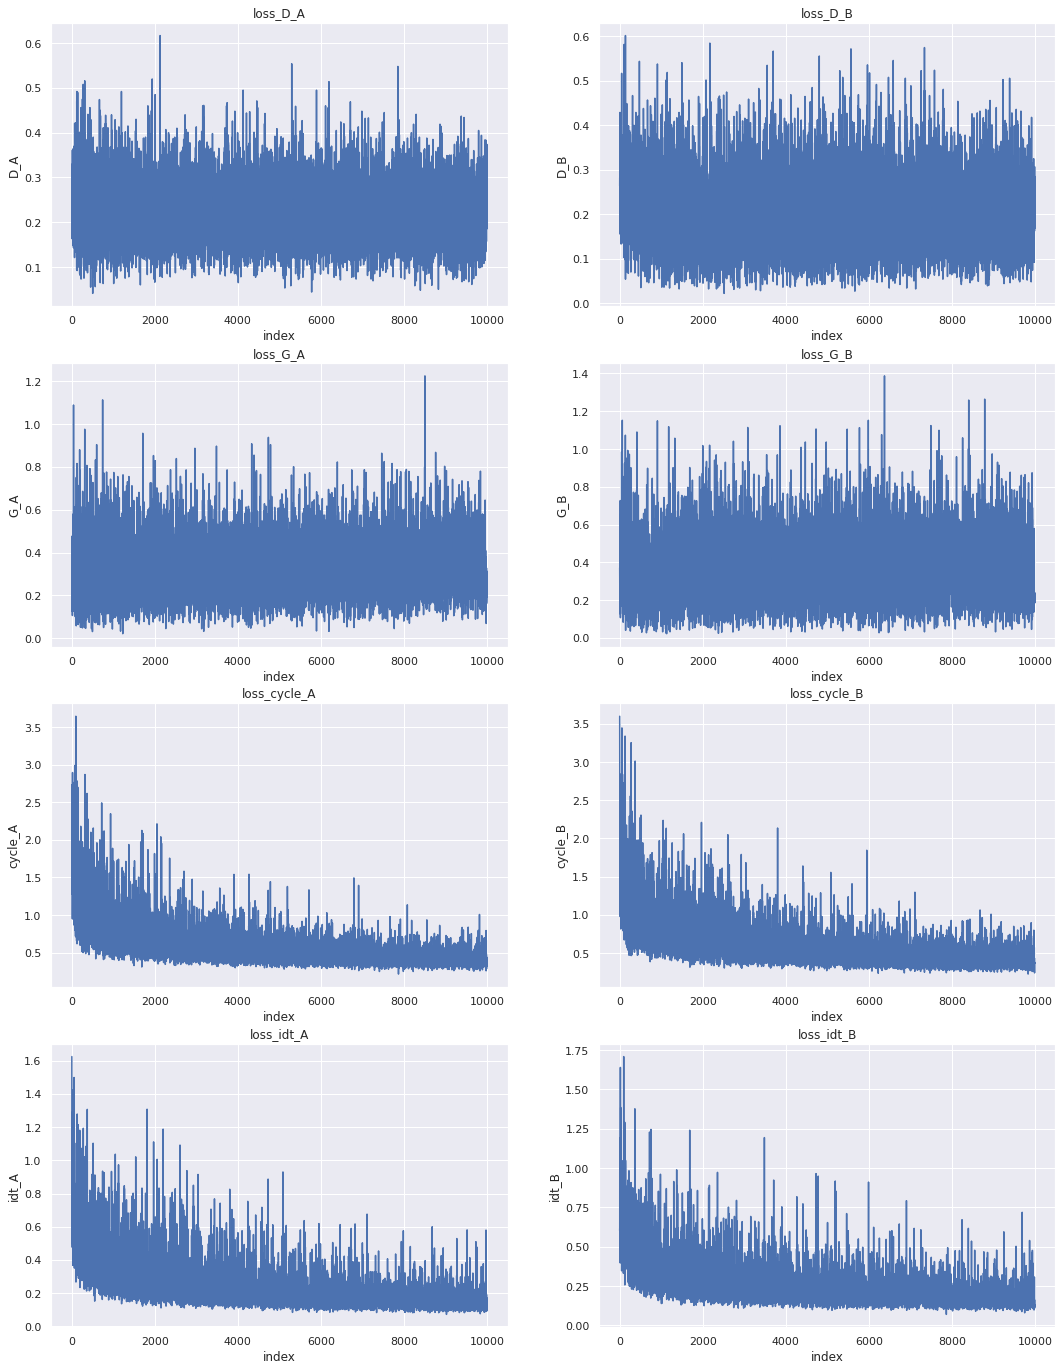

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# 4行2列のグラフを作成
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18,24))

# Adversarial Loss(D)
sns.lineplot(x='index', y='D_A', data=df_loss, ax=ax1).set_title('loss_D_A')
sns.lineplot(x='index', y='D_B', data=df_loss, ax=ax2).set_title('loss_D_B')
# Adversarial Loss(G)
sns.lineplot(x='index', y='G_A', data=df_loss, ax=ax3).set_title('loss_G_A')
sns.lineplot(x='index', y='G_B', data=df_loss, ax=ax4).set_title('loss_G_B')
# Cycle Consistency Loss
sns.lineplot(x='index', y='cycle_A', data=df_loss, ax=ax5).set_title('loss_cycle_A')
sns.lineplot(x='index', y='cycle_B', data=df_loss, ax=ax6).set_title('loss_cycle_B')
# Identity Mapping Loss
sns.lineplot(x='index', y='idt_A', data=df_loss, ax=ax7).set_title('loss_idt_A')
sns.lineplot(x='index', y='idt_B', data=df_loss, ax=ax8).set_title('loss_idt_B')

plt.show()

ファイル数のカウント（解凍後に確認用）↓

In [ ]:
#フォルダ内のファイル数の確認
#調べたいフォルダのパス
path = "/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/datasets/3_mydata/trainA"
#全ファイルをリスト化
fl = os.listdir(path)
# ファイル数を確認
count = len(fl)
print(count)

4000


# 参考

1.   cycleganソースコード:
https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

2.   学習用データセットのソース:
https://github.com/NVlabs/ffhq-dataset

3.   Python + CycleGanでオリジナルデータでの学習を実装する(番外編):
https://www.hamlet-engineer.com/posts/cyclegan03.html

4.   CycleGAN_memo.ipynb:
https://colab.research.google.com/drive/1P0MjijpNgmoD4l7uqGOFnTWFXq29nNlv


#実行

A to B(眼鏡ありから無しに変換)↓

In [ ]:
#A to B(Glasses_cyclegan2NoGlasses_cyclegan)
#作成したモデルのテスト実行
%cd /content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!cp checkpoints/mydata_cyclegan/250_net_G_A.pth checkpoints/result/latest_net_G.pth #250epocks学習済みのモデルGeneratorAを用いる。
!python test.py --dataroot /content/drive/MyDrive/testdata/glass2noglass/ --name result  --results_dir /content/drive/MyDrive/testdata  --model test  --no_dropout  --num_test 2
# cp! ---/学習済みモデル ---/latest_net_G.pth
# --dataroot 変換したい画像パス
# --model test 検証モードに設定

/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
Failed checking if argv[0] is an import path entry
Traceback (most recent call last):
  File "<frozen zipimport>", line 93, in __init__
KeyError: '/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix/test.py'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen zipimport>", line 95, in __init__
  File "<frozen zipimport>", line 417, in _read_directory
KeyboardInterrupt
^C


B to A(眼鏡なしから有りに変換)↓

In [ ]:
#B to A(NoGlasses_cyclegan2Glasses_cyclegan)
#作成したモデルのテスト実行
#250epocks学習済みのモデルGeneratorBを用いる。
%cd /content/drive/MyDrive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
!cp checkpoints/mydata_cyclegan/250_net_G_B.pth checkpoints/result/latest_net_G.pth
!python test.py --dataroot /content/drive/MyDrive/testdata/noglass2glass/ --name result --results_dir /content/drive/MyDrive/testdata --model test --no_dropout --num_test 2

/content/drive/My Drive/Glasses_cyclegan/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/testdata/noglass2glass/	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False            